In [1]:
import matplotlib.pyplot as plt # used to create plots
from matplotlib.pyplot import figure # used to control size of plots
import numpy as np # for creation of arrays
import pandas as pd # for making data frames
import math # for plotting CMC using log10 scale

from sklearn import datasets, linear_model # linear regression model package
from sklearn.metrics import mean_squared_error, r2_score # statistics to score model 
from sklearn.model_selection import train_test_split # allows model to be tested on unseen data

In [2]:
def linear_regression(x_data, y_data, split, show_data, should_test):
          
    '''
    
    linear_regression:
    ------------------
    
    A function that takes in a list of x-data and y-data and uses sklearn package to find the linear relationship
    between the two variables.
    
    Args:
    -----
    
    x_data: list of values for the x-axis
    y-data: list of values for the y-axis
    split: how much training data to use (e.g. 0.8 = 80% for training)
    show_data: boolean to say if information about regression should be printed (training data, test data, gradient
    y-intercept, mean square error, root mean square error and coefficient of determination)
    should_test: boolean used to describe whether predictions should be made using the test set
    
    Returns:
    --------
    
    x_test: list of test data from the x-axis
    x_train: list of train data from the x-axis
    y_train: list of test data from the y-axis
    y_test: list of train data from the y-axis
    pred: list of predicted y-values using the x-test data
    pred_all: list of predicted y-values for all data using the relationship y = mx + c
    grad: gradient of predicted line
    intercept: y-intercept of predicted line
    was_test: list of boolean values to say if data was used in the test set (True) or training set (False)
    
    '''
    
    indices = np.arange(len(x_data)) # list of integer values making up the indices of the data
    was_test = []
    
    regr = linear_model.LinearRegression() # create linear regression object
    
    if should_test: # only has a test/train split if there is enough data
        # splits the x- and y-test data randomly according to the specified ratio
        x_train, x_test, y_train, y_test, train_ind, test_ind = train_test_split(x_data, y_data, indices, 
                                                                                 train_size = split, 
                                                                                 random_state = 32)
        
        for ind in indices: # returns boolean for each index to say if it was used as test data
            if ind in train_ind:
                was_test.append(False)
            if ind in test_ind:
                was_test.append(True)

        x_train_format = np.array(x_train) # reformat the lengths as numpy arrays as required to reshape later
        x_test_format = np.array(x_test)

        if not isinstance(x_data[0], int): # rounds any data that is not an integer to print later 
            x_data_round = [round(elem, 2) for elem in x_data]
            x_train_round = [round(train, 2) for train in x_train]
            x_test_round = [round(test, 2) for test in x_test]
        else:
            x_data_round = x_data
            x_train_round = x_train
            x_test_round = x_test
    else: # otherwise all data is used to train
        x_train_format = np.array(x_data)
        y_train = y_data
        for ind in range(len(x_data)):
            was_test.append(False)
        
        if not isinstance(x_data[0], int): # rounds any data that is not an integer to print later 
            x_data_round = [round(elem, 2) for elem in x_data]
        else:
            x_data_round = x_data
    
    regr.fit(x_train_format.reshape(-1,1), y_train) # train the model using the training sets
    
    if should_test:    
        pred = regr.predict(x_test_format.reshape(-1,1)) # make predictions using the testing set
        
    grad = regr.coef_[0] # gradient of the predicted linear relationship 
    intercept = regr.intercept_  # y-intercept of the predicted linear relationship
    
    if should_test:
        mse = mean_squared_error(y_test, pred) # mean squared error of results
        rmse = np.sqrt(mean_squared_error(y_test, pred)) # root mean squared error 
        co_det = r2_score(y_test, pred) # coefficient of determination 
    
    pred_all = []
    for x_val in x_data: # makes predictions for data based on linear relationship
        pred_val = (grad * x_val) + intercept
        pred_all.append(pred_val)
    
    x_test = []; x_train = []; y_train = []; y_test = []; pred = []; pred_all = []
    
    if show_data:  # prints data if asked for
        if should_test:
            print("All: ", x_data_round)
            print("Train: ", x_train_round)
            print("Test: ", x_test_round, "\n")
    
            print("Gradient: ", grad)
            print("Intercept: ", intercept)
            print("Mean squared error: %.2f" % mse)
            print("Root mean squared error: %.2f" % rmse)
            print("Coefficient of determination: %.2f" % co_det)
            print("\n")
        else:
            print("All (no test data used): ", x_data_round)
            print("Gradient: ", grad)
            print("Intercept: ", intercept)
            print("\n")
    
    return(x_test, x_train, y_train, y_test, pred, pred_all, grad, intercept, was_test)

In [3]:
def linear_reg_stats_average(x_data, y_data, split):
              
    '''
    
    linear_reg_stats_average:
    --------------------------
    
    A function that takes in a list of x-data and y-data and finds the average values of the statistics coefficient
    of determination, root mean square error and mean absolute error using sklearn to find the linear relationship.
    
    Args:
    -----
    
    x_data: list of values for the x-axis
    y-data: list of values for the y-axis
    split: test/train split
    
    Returns:
    --------
    
    rmse_av: average value of the root mean square error
    co_det_av: average value of the coefficient of determination
    mae_av: average value of the mean absolute error
    
    '''
    
    indices = np.arange(len(x_data)) # list of integer values making up the indices of the data
    
    rmse_list = []; co_det_list = []; mae_list = []
    rmse_total = 0; co_det_total = 0; mae_total = 0
    count = 0
    
    for rs in range(100):
        
        # splits the x- and y-test data randomly according to the specified ratio
        x_train, x_test, y_train, y_test, ind_train, ind_test = train_test_split(x_data, y_data, indices, 
                                                                                 train_size = split, 
                                                                                 random_state = rs)

        x_train_format = np.array(x_train) # reformat the lengths as numpy arrays as required to reshape later
        x_test_format = np.array(x_test)

        regr = linear_model.LinearRegression() # create linear regression object
        regr.fit(x_train_format.reshape(-1,1), y_train) # train the model using the training sets                                  
        pred = regr.predict(x_test_format.reshape(-1,1)) # make predictions using the testing set
        
        mse = mean_squared_error(y_test, pred) # mean squared error of results
        rmse = np.sqrt(mean_squared_error(y_test, pred)) # root mean squared error 
        co_det = r2_score(y_test, pred) # coefficient of determination 
        mae = sum(abs(y_test-pred)) / len(y_test) # mean absolute error 
        
        if co_det < 0.0: # assumes no correlation if below zero
            co_det = 0.0
            
        rmse_list.append(rmse); co_det_list.append(co_det); mae_list.append(mae)
            
        rmse_total += rmse # adds up the statistics values
        co_det_total += co_det
        mae_total += mae
        count += 1
        
    rmse_av = rmse_total / count # finds the average by dividing by the number of loops
    co_det_av = co_det_total / count
    mae_av = mae_total / count
    
    print("RMSE: ", round(rmse_av, 2))
    print("Coefficient of Determination: ", round(co_det_av, 2))
    print("MAE: ", round(mae_av, 2))
    
    return(rmse_av, co_det_av, mae_av)

In [4]:
def predict_cmc(gradient, intercept, data):
              
    '''
    
    predict_cmc:
    ------------
    
    A function that takes in the gradient and y-intercept of its linear relationship and uses required data to 
    predict the cmc output according to the straight line equation (y = mx + c)
    
    Args:
    -----
    
    gradient: gradient from linear regression
    y-intercept: y-intercept from linear regression
    data: x-value to put into equation 
    
    Returns:
    --------
    
    cmc: predicted cmc value
    
    '''
    
    ln_cmc = (gradient*data) + intercept  # this returns the ln(cmc) as this was the straight line relationship
    cmc = np.exp(ln_cmc) # finds cmc using exponential 
    
    return(cmc)

In [5]:
def pred_cmc_list(test_val, gradient, y_intercept):
              
    '''
    
    pred_cmc_list:
    -------------
    
    A function that takes in a list of gradient and y-intercept value of its linear relationship and uses a list 
    of data to predict the cmc output according to the straight line equation (y = mx + c) for each gradient 
    
    Args:
    -----
    
    gradient: list of gradients from linear regression
    y-intercept: list of y-intercepts from linear regression
    test: list of x-values to put into equation 
    
    Returns:
    --------
    
    pred_cmc: predicted cmc embedded list 
    
    '''
       
    pred_cmc = []

    for ind, grad_val in enumerate(gradient): 
        pred_cmc_indiv = [] # creates list of predicted cmc values for that gradient
        for num in test_val: # loops through the x-values for which cmc will be predicted
            cmc = predict_cmc(grad_val, y_intercept[ind], num) # uses function to find cmc value
            pred_cmc_indiv.append(cmc)    
        pred_cmc.append(pred_cmc_indiv)
        
    return(pred_cmc)

In [6]:
def select_data(func_group, carbon_len, cmc_vals, mol_weight, val_elec, logp, endfunc_pos, startfunc_pos, 
                selector):
                  
    '''
    
    select_data:
    ------------
    
    A function that takes in a list of all data required and splits the data based on the required head groups
    
    Args:
    -----
    
    func_group, carbon_len, cmc_vals, mol_weight, val_elec, logp: list of data to be separated
    endfunc_pos: list to show were each new head group data ends
    startfunc_pos: list to show were each new head group data starts
    selector: tells function which data to select
    
    Returns:
    --------
    
    select_{data}: returns same lists but with only selected data 
    
    '''
     
    select_func_group = []; select_carbon_len = []; select_aromatic = []; select_cmc = []; select_ln_cmc = []
    select_MW = []; select_val_elec = []; select_logp = []
    # creates new empty lists for the data
    
    for num in selector:  # uses the select list to find only the required data and adds to select list
        for FG in func_group[startfunc_pos[num]:endfunc_pos[num]]:
            select_func_group.append(FG)
        for CL in carbon_len[startfunc_pos[num]:endfunc_pos[num]]:
            select_carbon_len.append(CL)
        for CMC in cmc_vals[startfunc_pos[num]:endfunc_pos[num]]:
            select_cmc.append(CMC)
            select_ln_cmc.append(np.log(CMC))
        for MW in mol_weight[startfunc_pos[num]:endfunc_pos[num]]:
            select_MW.append(MW)
        for VE in val_elec[startfunc_pos[num]:endfunc_pos[num]]:
            select_val_elec.append(VE)
        for LP in logp[startfunc_pos[num]:endfunc_pos[num]]:
            select_logp.append(LP)
        
    return(select_func_group, select_carbon_len, select_cmc, select_ln_cmc, select_MW, select_val_elec, 
           select_logp)

In [7]:
def select_data2(func_group, tail_group, carbon_len, cmc_vals, mol_weight, val_elec, logp, selector):
                  
    '''
    
    select_data2:
    -------------
    
    A function that takes in a list of all data required and splits the data based on the required tail groups
    
    Args:
    -----
    
    func_group, tail_group, carbon_len, cmc_vals, mol_weight, val_elec, logp: list of data to be separated
    selector: tells function which data to select
    
    Returns:
    --------
    
    select_{data}: returns same lists but with only selected data 
    
    '''
     
    select_func_group = []; select_tail_group = []; select_carbon_len = []; select_cmc = []
    select_ln_cmc = []; select_MW = []; select_val_elec = []; select_logp = []
    # creates new empty lists for the data
    
    for num in selector:  # uses the select list to find only the required data and adds to select list
        select_func_group.append(func_group[num]); select_tail_group.append(tail_group[num])
        select_carbon_len.append(carbon_len[num]); select_cmc.append(cmc_vals[num])
        select_ln_cmc.append(np.log(cmc_vals[num])); select_MW.append(mol_weight[num])
        select_val_elec.append(val_elec[num]); select_logp.append(logp[num])
        
    return(select_func_group, select_tail_group, select_carbon_len, select_cmc, select_ln_cmc, select_MW, 
           select_val_elec, select_logp)

In [8]:
def grad_intercept_plotter(diff_group, y_intercept, gradient, colours, is_tail, file_name):
                      
    '''
    
    grad_intercept_plotter:
    -----------------------
    
    A function that plots the gradient against the y-intercept 
    
    Args:
    -----
    
    diff_group: identifies type of molecule
    y_intecept: list of y-intercept values for each molecule
    gradient: list of gradient values for each molecule
    colours: dictionary of head groups and their corresponding colours
    is_tail: boolean to show if plotting tail groups to control how the legend appears
    file_name: name to save figure as 
    
    Returns:
    --------
    
    plot showing the gradient against y-intercept, colour coded to show the head group
    
    '''
     
    for i, group in enumerate(diff_group): # for each different group, plots a colour-coded point 
        plt.scatter(y_intercept[i], gradient[i], label = group, color = colours[group])

    plt.ylabel("Gradient")
    plt.xlabel("y-intercept")
    if is_tail: # legend split into two coloumns if plotting different tail groups
        plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, ncol = 2) 
    else:
        plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0)
    
    #plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    plt.show()

In [9]:
def pred_true_cmc_data(meas_cmc, test_var, gradient, y_intercept):
                      
    '''
    
    pred_true_cmc_data:
    -------------------
    
    A function based on the data predicted for the descriptors where only the head group was used in the 
    prediction. It takes in the gradient and y-intercept found from the linear relationship between the chosen
    descriptor and the CMC value and uses it to predict the CMC value based on the data given. It also finds the 
    difference between the true CMC value and the predicted CMC value.
    
    Args:
    -----
    
    meas_cmc: CMC values for the data being tested
    test_var: descriptor values for the data being tested
    gradient: list of gradient values for each molecule
    y_intecept: list of y-intercept values for each molecule
    
    Returns:
    --------
    
    sep_cmc_pred: list of lists of the predicted CMC value separated into different lists based on the head group
    sep_cmc_diff: list of lists of difference between measured and predicted CMC value
    
    '''
         
    cmc_select_all = []
    for cmc_list in meas_cmc: # puts data into only one list that is currently separated based on tail group 
        for cmc in cmc_list:
            cmc_select_all.append(cmc)       
    
    test_select_all = []; pred_cmc_test = []
    for ind, test_list in enumerate(test_var): # loops through list of lists (based on tail group)
        curr_grad = gradient[ind] # finds associated gradient and y-intercept
        curr_inter = y_intercept[ind]
        for test in test_list: # loops through data to test for each head group
            test_select_all.append(test)       
            cmc_pred = predict_cmc(curr_grad, curr_inter, test) # uses function to find predicted CMC value
            pred_cmc_test.append(cmc_pred)   
            
    pred_cmc_diff = []
    for ind, pred_val in enumerate(pred_cmc_test): # loops through predicted values
        diff = abs(cmc_select_all[ind] - pred_val) # finds difference between predicted and measured CMC value
        pred_cmc_diff.append(diff)
        
    sep_cmc_pred = []; sep_cmc_diff = []
    start_pos_pred = 0; start_pos_diff = 0
    for num in test_var:           
        indiv_pred = []; indiv_diff = [] 
        for pred in pred_cmc_test[start_pos_pred:(len(num)+start_pos_pred)]:
            indiv_pred.append(pred) # reassigns the predicted value back to the tail group associated with it
        start_pos_pred += len(num)
        for diff in pred_cmc_diff[start_pos_diff:(len(num)+start_pos_diff)]:
            indiv_diff.append(diff) # does the same for difference between predicted and measured
        start_pos_diff += len(num)
        sep_cmc_pred.append(indiv_pred) # puts data back into a list of lists based on tail group
        sep_cmc_diff.append(indiv_diff)
    
    return(sep_cmc_pred, sep_cmc_diff)

In [10]:
def pred_true_cmc_data2(cmc_select, test_select, gradient, y_intercept, startfunc_pos, endfunc_pos, head_group):
                      
    '''
    
    pred_true_cmc_data:
    -------------------
    
    A function based on the data predicted for the descriptors where only the tail group was used in the 
    prediction. It takes in the gradient and y-intercept found from the linear relationship between the chosen
    descriptor and the CMC value and uses it to predict the CMC value based on the data given. It also finds the 
    difference between the true CMC value and the predicted CMC value.
    
    Args:
    -----
    
    cmc_select: CMC values for the data being tested
    test_select: descriptor values for the data being tested
    gradient: list of gradient values for each molecule
    y_intecept: list of y-intercept values for each molecule
    startfunc_pos: list to show were each new head group data starts
    endfunc_pos: list to show were each new head group data ends
    head_group: identifies type of molecule
    
    Returns:
    --------
    
    sep_cmc_pred: list of lists of the predicted CMC value separated into different lists based on the head group
    sep_cmc_diff: list of lists of difference between measured and predicted CMC value
    
    '''
         
    cmc_select_all = []
    for cmc_list in cmc_select: # puts data into only one list that is currently separated based on head group 
        for cmc in cmc_list:
            cmc_select_all.append(cmc) 
            
    test_select_all = []; pred_cmc_test = []
    for ind, test_list in enumerate(test_select): # loops through list of lists (based on head group)
        curr_grad = gradient[ind] # finds associated gradient and y-intercept
        curr_inter = y_intercept[ind]
        for test in test_list: # loops through data to test for each head group
            test_select_all.append(test)       
            cmc_pred = predict_cmc(curr_grad, curr_inter, test) # uses function to find predicted CMC value
            pred_cmc_test.append(cmc_pred)     
            
    pred_cmc_diff = []
    for ind, pred_val in enumerate(pred_cmc_test): # loops through predicted values
        diff = abs(cmc_select_all[ind] - pred_val) # finds difference between predicted and measured CMC value
        pred_cmc_diff.append(diff)
        
    sep_cmc_pred = []; sep_cmc_diff = []
    for num in range(len(head_group)):  
        indiv_pred = []                 
        indiv_diff = []                 
        for pred in pred_cmc_test[startfunc_pos[num]:endfunc_pos[num]]:
            indiv_pred.append(pred) # reassigns the predicted value back to the head group associated with it
        for diff in pred_cmc_diff[startfunc_pos[num]:endfunc_pos[num]]:
            indiv_diff.append(diff) # does the same for difference between predicted and measured
        sep_cmc_pred.append(indiv_pred) # puts data back into a list of lists based on head group
        sep_cmc_diff.append(indiv_diff)
    
    return(sep_cmc_pred, sep_cmc_diff)

In [11]:
def average_diff_pred(head_pred, tail_pred, same_tail_pred_pos, same_head_pred_pos, was_test_head, was_test_tail):
                      
    '''
    
    average_diff_pred:
    ------------------
    
    A function calculates the difference between the CMC values calculated using descriptors based on the tail 
    group and on the head group only. It also finds the average CMC value of the two predictions.
    
    Args:
    -----
    
    head_pred: predictions of CMC based on the head group descriptor values only (same tail)
    tail_pred: predictions of CMC based on the tail group descriptor values only (same head)
    same_tail_pred_pos: index from the original data set from where the predicted data comes from
    same_head_pred_pos: index from the original data set from where the predicted data comes from
    was_test_head: list of boolean values to say if it was used as the test set for head group descriptors
    was_test_tail: list of boolean values to say if it was used as the test set for tail group descriptors
    
    Returns:
    --------
    
    average: average of the two predicted CMC values
    difference: difference between the two predicted values
    index: index of predictions based the original data set 
    test: list of either 0 (never test set), 1 (test set in one of the calculations) or 2 (always test set)
    
    '''
             
    average = []; difference = []; index = []; test = []
    pos_same_tail = []; head_pred_same_tail = []; head_was_test_same_tail = []
    pos_same_head = []; tail_pred_same_head = []; tail_was_test_same_head = []
    
    for ind1, t_pos_list in enumerate(same_tail_pred_pos):   
        for ind2, t_pos in enumerate(t_pos_list):
            pos_same_tail.append(t_pos) # finds index of each of the predicted values for 
                                        # same tail group based on descriptors for head
            head_pred_same_tail.append(head_pred[ind1][ind2])
            head_was_test_same_tail.append(was_test_head[ind1][ind2])
    for ind1, h_pos_list in enumerate(same_head_pred_pos):
        for ind2, h_pos in enumerate(h_pos_list):
            pos_same_head.append(h_pos) # finds index of each of the predicted values for 
                                        # same head group based on descriptors for tail
            tail_pred_same_head.append(tail_pred[ind1][ind2]) 
            tail_was_test_same_head.append(was_test_tail[ind1][ind2])

    for t_ind, t_pred in enumerate(tail_pred_same_head): # loops through predictions based on tail
        tail_pred_ind = pos_same_head[t_ind] # corresponding index for each prediction 
        test_t = tail_was_test_same_head[t_ind]
        for h_ind, h_pred in enumerate(head_pred_same_tail):
            head_pred_ind = pos_same_tail[h_ind]
            test_h = head_was_test_same_tail[h_ind]
            if head_pred_ind == tail_pred_ind: # if they correspond to same molecule, the index will be the same
                av = (h_pred + t_pred) / 2  # finds the average of the predictions
                diff = abs(h_pred - t_pred) # finds difference between predictions
                average.append(av); difference.append(diff); index.append(tail_pred_ind)
    
                if test_h == True and test_t == True:
                    test.append(2) # used to show it was a test point for both head and tail descriptors
                elif test_h == True and test_t == False:
                    test.append(1) # shows it was a test point for only one of head or tail descriptors
                elif test_h == False and test_t == True:
                    test.append(1)
                elif test_h == False and test_t == False:
                    test.append(0) # shows it was used as a training point in both cases
        
    return(average, difference, index, test)

In [12]:
def plot_diff_predict_cmc(difference, diff_cap, index, head_group, colours, file_name):
                                      
    '''
    
    plot_diff_predict_cmc:
    ----------------------
    
    A function that plots the difference between the predictions made based on descriptors using only the tail
    group and those made based on descriptors using only the head group, colour coded based on the head group
    
    Args:
    -----
    
    difference: list of values of difference between prediction
    diff_cap: only plots below cap values
    index: index of data used
    colours: dictionary of head groups and their corresponding colours
    head_group: identifies type of molecule
    file_name: name to save figure as 
    
    Returns:
    --------
    
    plot showing difference between predicted CMC value using head group descriptors and tail group descriptors
    for the individual head group
    
    '''
    
    f = plt.figure() # changes size of plot to show results more clearly
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
     # labels prevent head group showing up multiple times in legend
    CO2Na_label = 0; NH3Cl_label = 0; NMe3Br_label = 0; OSO3Na_label = 0; SO3Na_label = 0; PyBr_label = 0
    Ethoxylates_label = 0; Carboxylic_Acid_label = 0; NMe2NBzCl_label = 0; NH3Ac_label = 0; SO3H_label = 0

    for ind, diff in enumerate(difference):
        curr_head = head_group[ind]
        if diff > diff_cap: # only plots below a certain value specified
            diff = diff_cap
        
        # checks if the individual head group has already been labelled in the legend and if not, plots the
        # data with the label corresponding to the head group
        if CO2Na_label == 0 and curr_head == "CO2Na":  
            plt.scatter(index[ind], diff, s = 10, color = colours[curr_head], label = curr_head)
            CO2Na_label += 1
        elif NH3Cl_label == 0 and curr_head == "NH3Cl":  
            plt.scatter(index[ind], diff, s = 10, color = colours[curr_head], label = curr_head)
            NH3Cl_label += 1
        elif NMe3Br_label == 0 and curr_head == "NMe3Br":  
            plt.scatter(index[ind], diff, s = 10, color = colours[curr_head], label = curr_head)
            NMe3Br_label += 1
        elif OSO3Na_label == 0 and curr_head == "OSO3Na":  
            plt.scatter(index[ind], diff, s = 10, color = colours[curr_head], label = curr_head)
            OSO3Na_label += 1
        elif SO3Na_label == 0 and curr_head == "SO3Na":  
            plt.scatter(index[ind], diff, s = 10, color = colours[curr_head], label = curr_head)
            SO3Na_label += 1
        elif PyBr_label == 0 and curr_head == "PyBr":  
            plt.scatter(index[ind], diff, s = 10, color = colours[curr_head], label = curr_head)
            PyBr_label += 1
        elif Ethoxylates_label == 0 and curr_head == "Ethoxylates":  
            plt.scatter(index[ind], diff, s = 10, color = colours[curr_head], label = curr_head)
            Ethoxylates_label += 1
        elif Carboxylic_Acid_label == 0 and curr_head == "Carboxylic Acid":  
            plt.scatter(index[ind], diff, s = 10, color = colours[curr_head], label = curr_head)
            Carboxylic_Acid_label += 1
        elif NMe2NBzCl_label == 0 and curr_head == "NMe2NBzCl":  
            plt.scatter(index[ind], diff, s = 10, c = colours[curr_head], label = curr_head)
            NMe2NBzCl_label += 1
        elif SO3H_label == 0 and curr_head == "SO3H":  
            plt.scatter(index[ind], diff, s = 10, c = colours[curr_head], label = curr_head)
            SO3H_label += 1
        elif NH3Ac_label == 0 and curr_head == "NH3Ac":  
            plt.scatter(index[ind], diff, s = 10, c = colours[curr_head], label = curr_head)
            NH3Ac_label += 1
        else: # if it already has a label, it plots without one to avoid multiples in the legend
            plt.scatter(index[ind], diff, s = 10, color = colours[curr_head])
                
    plt.ylabel("Difference between predicted CMC values / mM")
    plt.xlabel("Index", fontsize = 20) 
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0)
    
    #plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    plt.show()
    
    return

In [13]:
def av_meas_pred_plotter(meas_max, pred_max, predictions, measured, index, was_test, func_group, plot_as_log, 
                         colours, leg_col, file_name, save_fig):
              
    '''
    
    av_meas_pred_plotter:
    ---------------------
    
    A function that plots a graph of the predicted CMC against the measured CMC value and colour codes them based
    on the head group.
    
    Args:
    -----
    
    meas_max: maximum value of measured CMC data that can exclue some data to more clearly show the lower values
    pred_max: maximum value of predicted CMC data that will be shown on the graph
    predictions: average CMC predicted values 
    measured: measured CMC values corresponding to the test features that the prediction was made from
    index: index of the data used 
    func_group: list of functional groups in the whole data set used
    plot_as_log: boolean to say if log10 scale should be used in plot
    colours: dictionary of the head groups and their corresponding colours for the plot
    leg_col: number of columns in legend
    file_name: name to save figure as
    save_fig: boolean to say if figure should be saved
    
    Returns:
    --------
    
    plot of the averaged predicted CMC value against the measured CMC value, colour coded based on head group
    
    '''
    
    f = plt.figure() # changes size of plot to show results more clearly
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    new_meas = []
    new_pred = []
    
    # labels prevent head group showing up multiple times in legend
    CO2Na_label = 0; NH3Cl_label = 0; NMe3Br_label = 0; OSO3Na_label = 0; SO3Na_label = 0; PyBr_label = 0
    Ethoxylates_label = 0; Carboxylic_Acid_label = 0; NMe2NBzCl_label = 0; NH3Ac_label = 0; SO3H_label = 0

    for ind, pred in enumerate(predictions): 
        meas = measured[ind] # for each predicted finds corresponding measured value
        
        if plot_as_log:
            meas = math.log10(meas)
            pred = math.log10(pred)
        
        new_meas.append(meas)
        new_pred.append(pred)
        
        test = was_test[ind] # changes marker depending on whether the point is test or training data
        if meas < meas_max and pred < pred_max: # only plots values below the specified max
            true_ind = index[ind] # finds the index of the data from the original data set 
            head_group = func_group[true_ind] # index used to find corresponding head group
            if test == 2:  # changes marker, fill and size depending on whether the point is test or training data
                mark = "v" # for both head and tail group descriptors
                size = 36
                mfc = colours[head_group]
                mec = colours[head_group]
            elif test == 1:
                mark = "v"
                size = 36
                mfc = "None"
                mec = colours[head_group]
            elif test == 0:
                mark = "o"
                size = 28
                mfc = "None"
                mec = colours[head_group]
 
            # checks if the individual head group has already been labelled in the legend and if not, plots the
            # data with the label corresponding to the head group
            if CO2Na_label == 0 and head_group == "CO2Na":  
                plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = head_group,
                           marker = mark)
                CO2Na_label += 1
            elif NH3Cl_label == 0 and head_group == "NH3Cl":  
                plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = head_group,
                           marker = mark)
                NH3Cl_label += 1
            elif NMe3Br_label == 0 and head_group == "NMe3Br":  
                plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = head_group,
                           marker = mark)
                NMe3Br_label += 1
            elif OSO3Na_label == 0 and head_group == "OSO3Na":  
                plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = head_group,
                           marker = mark)
                OSO3Na_label += 1
            elif SO3Na_label == 0 and head_group == "SO3Na":  
                plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = head_group,
                           marker = mark)
                SO3Na_label += 1
            elif PyBr_label == 0 and head_group == "PyBr":  
                plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = head_group,
                           marker = mark)
                PyBr_label += 1
            elif Ethoxylates_label == 0 and head_group == "Ethoxylates":  
                plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = head_group,
                           marker = mark)
                Ethoxylates_label += 1
            elif Carboxylic_Acid_label == 0 and head_group == "Carboxylic Acid":  
                plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = head_group,
                           marker = mark)
                Carboxylic_Acid_label += 1
            elif NMe2NBzCl_label == 0 and head_group == "NMe2NBzCl":  
                plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = head_group,
                           marker = mark)
                NMe2NBzCl_label += 1
            elif SO3H_label == 0 and head_group == "SO3H":  
                plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = head_group,
                           marker = mark)
                SO3H_label += 1
            elif NH3Ac_label == 0 and head_group == "NH3Ac":  
                plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = head_group,
                           marker = mark)
                NH3Ac_label += 1
            else: # if it already has a label, it plots without one to avoid multiples in the legend
                plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, marker = mark)

    highest_num = max(max(new_meas), max(new_pred)) # finds largest value in both lists
    lowest_num = min(min(new_meas), min(new_pred))
    if highest_num > meas_max or highest_num > pred_max: # used to plot ideal line only below desired value
        highest_num = max(meas_max, pred_max)
    
    all_num_list = np.arange(lowest_num, highest_num, 1.0) # plots line where pred equals measured for comparison
    plt.plot(all_num_list, all_num_list, linestyle = "dashed", color = "black", linewidth = 0.5)

    if plot_as_log:
        y_lab = "Predicted log(CMC / mM)"
        x_lab = "Measured log(CMC / mM)"
    else:
        y_lab = "Predicted CMC / mM"
        x_lab = "Measured CMC / mM"
        
    plt.ylabel(y_lab, fontsize = 20)
    plt.xlabel(x_lab, fontsize = 20)
    
    plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, fontsize = "x-large", 
               ncol = leg_col)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [14]:
def pred_meas_cmc_plotter(cmc_pred, cmc_measured, meas_max, pred_max, plot_as_log, colours, head_group, was_test, 
                          leg_col, file_name, save_fig):
                                  
    '''
    
    pred_meas_cmc_plotter:
    ----------------------
    
    A function that plots the predicted CMC value against the measured CMC value and the predicted CMC value 
    calculated using one of the linear relationships between ln(CMC) and a descriptor with colour codes based on 
    the head group
    
    Args:
    -----
    
    cmc_pred: predicted CMC value
    cmc_measured: measured CMC value
    meas_max: maximum value of measured CMC data that can exclue some data to more clearly show the lower values
    pred_max: maximum value of predicted CMC data that will be shown on the graph
    plot_as_log: boolean to say if log10 scale should be used in plot
    colours: dictionary of head groups and their corresponding colours
    head_group: identifies head group of molecule
    leg_col: number of columns in legend
    file_name: name to save figure as
    save_fig: boolean to say if figure should be saved
    
    Returns:
    --------
    
    plot showing predicted (using one of the descriptors) and measured CMC value for the individual head group
    
    '''
    
    # labels prevent head group showing up multiple times in legend
    CO2Na_label = 0; NH3Cl_label = 0; NMe3Br_label = 0; OSO3Na_label = 0; SO3Na_label = 0; PyBr_label = 0
    Ethoxylates_label = 0; Carboxylic_Acid_label = 0; NMe2NBzCl_label = 0; NH3Ac_label = 0; SO3H_label = 0
     
    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    new_meas = []
    new_pred = []
        
    for ind1, pred_list in enumerate(cmc_pred): # plots based on head group
        curr_head = head_group[ind1]
        meas_list = cmc_measured[ind1]
        curr_was_test = was_test[ind1]
        #plt.scatter(meas_list, pred_list, s = 36, c = colours[curr_head], label = curr_head)
        for ind2, pred in enumerate(pred_list): # gets individual value
            test = curr_was_test[ind2] # changes marker, fill and size  depending on whether the point is test 
            if test:                   # or training data
                mark = "v"
                size = 36
                mfc = colours[curr_head]
                mec = colours[curr_head]
            else:
                mark = "o"
                size= 28
                mfc = "None"
                mec = colours[curr_head]
            
            meas = meas_list[ind2]
            
            if plot_as_log:
                meas = math.log10(meas)
                pred = math.log10(pred)
        
            new_meas.append(meas)
            new_pred.append(pred)
            
            if meas < meas_max and pred < pred_max: # only plots values below the specified max
 
            # checks if the individual head group has already been labelled in the legend and if not, plots the
            # data with the label corresponding to the head group
                if CO2Na_label == 0 and curr_head == "CO2Na":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_head, marker = mark)
                    CO2Na_label += 1
                elif NH3Cl_label == 0 and curr_head == "NH3Cl":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_head, marker = mark)
                    NH3Cl_label += 1
                elif NMe3Br_label == 0 and curr_head == "NMe3Br":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    NMe3Br_label += 1
                elif OSO3Na_label == 0 and curr_head == "OSO3Na":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    OSO3Na_label += 1
                elif SO3Na_label == 0 and curr_head == "SO3Na":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    SO3Na_label += 1
                elif PyBr_label == 0 and curr_head == "PyBr":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    PyBr_label += 1
                elif Ethoxylates_label == 0 and curr_head == "Ethoxylates":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    Ethoxylates_label += 1
                elif Carboxylic_Acid_label == 0 and curr_head == "Carboxylic Acid":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    Carboxylic_Acid_label += 1
                elif NMe2NBzCl_label == 0 and curr_head == "NMe2NBzCl":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    NMe2NBzCl_label += 1
                elif SO3H_label == 0 and curr_head == "SO3H":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    SO3H_label += 1
                elif NH3Ac_label == 0 and curr_head == "NH3Ac":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    NH3Ac_label += 1
                else: # if it already has a label, it plots without one to avoid multiples in the legend
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, marker = mark)
        
    highest_num = max(max(new_meas), max(new_pred)) # finds largest value in both lists
    lowest_num = min(min(new_meas), min(new_pred))
    if highest_num > meas_max or highest_num > pred_max: # used to plot ideal line only below desired value
        highest_num = max(meas_max, pred_max)
        
    all_num_list = np.arange(lowest_num, highest_num, 1.0) # plots line where pred equals measured for comparison
    plt.plot(all_num_list, all_num_list, linestyle = "dashed", color = "black", linewidth = 0.5)

    if plot_as_log:
        y_lab = "Predicted log(CMC / mM)"
        x_lab = "Measured log(CMC / mM)"
    else:
        y_lab = "Predicted CMC / mM"
        x_lab = "Measured CMC / mM"
        
    plt.ylabel(y_lab, fontsize = 20)
    plt.xlabel(x_lab, fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    legend = plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, fontsize = "x-large", 
                        ncol = leg_col)
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [15]:
def pred_meas_cmc_plotter2(cmc_pred, cmc_measured, meas_max, pred_max, plot_as_log, colours, tail_group, was_test, 
                           leg_col, file_name, save_fig):
                                  
    '''
    
    pred_meas_cmc_plotter2:
    ----------------------
    
    A function that plots the predicted CMC value against the measured CMC value and the predicted CMC value 
    calculated using one of the linear relationships between ln(CMC) and a descriptor with colour codes based on 
    the tail group
    
    Args:
    -----
    
    cmc_pred: predicted CMC value
    cmc_measured: measured CMC value
    meas_max: maximum value of measured CMC data that can exclue some data to more clearly show the lower values
    pred_max: maximum value of predicted CMC data that will be shown on the graph
    plot_as_log: boolean to say if log10 scale should be used in plot
    colours: dictionary of head groups and their corresponding colours
    tail_group: identifies tail group of molecule
    leg_col: number of columns in legend
    file_name: name to save figure as
    save_fig: boolean to say if figure should be saved
    
    Returns:
    --------
    
    plot showing predicted (using one of the descriptors) and measured CMC value for the individual tail group
    
    '''
    
    # labels prevent head group showing up multiple times in legend
    C7_label = 0; C8_label = 0; C9_label = 0; C10_label = 0; C11_label = 0; C12_label = 0; C13_label = 0
    C15_label = 0; C17_label = 0; C14_label = 0; C16_label = 0; C18_label = 0; C6Ph_label = 0; C7Ph_label = 0
    C8Ph_label = 0; C9Ph_label = 0; C10Ph_label = 0; C12Ph_label = 0; C14Ph_label = 0
     
    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    new_meas = []
    new_pred = []
        
    for ind1, pred_list in enumerate(cmc_pred): # plots based on tail group
        curr_tail = tail_group[ind1]
        meas_list = cmc_measured[ind1]
        curr_was_test = was_test[ind1]
        #plt.scatter(meas_list, pred_list, s = 36, c = colours[curr_tail], label = curr_tail)
        for ind2, pred in enumerate(pred_list): # gets individual value
            test = curr_was_test[ind2] # changes marker, fill and size depending on whether the point is test or 
            if test:                   # training data
                mark = "v"
                size = 36
                mfc = colours[curr_tail]
                mec = colours[curr_tail]
            else:
                mark = "o"
                size= 28
                mfc = "None"
                mec = colours[curr_tail]
            
            meas = meas_list[ind2]
            
            if plot_as_log:
                meas = math.log10(meas)
                pred = math.log10(pred)
        
            new_meas.append(meas)
            new_pred.append(pred)
            
            if meas < meas_max and pred < pred_max: # only plots values below the specified max
 
            # checks if the individual tail group has already been labelled in the legend and if not, plots the
            # data with the label corresponding to the tail group
                if C7_label == 0 and curr_tail == "C7":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C7_label += 1
                elif C8_label == 0 and curr_tail == "C8":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C8_label += 1
                elif C8_label == 0 and curr_tail == "C8":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C8_label += 1
                elif C9_label == 0 and curr_tail == "C9":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C9_label += 1
                elif C10_label == 0 and curr_tail == "C10":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C10_label += 1
                elif C11_label == 0 and curr_tail == "C11":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C11_label += 1
                elif C12_label == 0 and curr_tail == "C12":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C12_label += 1
                elif C13_label == 0 and curr_tail == "C13":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C13_label += 1
                elif C15_label == 0 and curr_tail == "C15":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C15_label += 1
                elif C17_label == 0 and curr_tail == "C17":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C17_label += 1
                elif C18_label == 0 and curr_tail == "C18":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C18_label += 1
                elif C6Ph_label == 0 and curr_tail == "C6Ph":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C6Ph_label += 1
                elif C7Ph_label == 0 and curr_tail == "C7Ph":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C7Ph_label += 1
                elif C8Ph_label == 0 and curr_tail == "C8Ph":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C8Ph_label += 1
                elif C9Ph_label == 0 and curr_tail == "C9Ph":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C9Ph_label += 1
                elif C10Ph_label == 0 and curr_tail == "C10Ph":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C10Ph_label += 1
                elif C12Ph_label == 0 and curr_tail == "C12Ph":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C12Ph_label += 1
                elif C14Ph_label == 0 and curr_tail == "C14Ph":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_tail, marker = mark)
                    C14Ph_label += 1
                else: # if it already has a label, it plots without one to avoid multiples in the legend
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, marker = mark)
        
    highest_num = max(max(new_meas), max(new_pred)) # finds largest value in both lists
    lowest_num = min(min(new_meas), min(new_pred))
    if highest_num > meas_max or highest_num > pred_max: # used to plot ideal line only below desired value
        highest_num = max(meas_max, pred_max)
        
    all_num_list = np.arange(lowest_num, highest_num, 1.0) # plots line where pred equals measured for comparison
    plt.plot(all_num_list, all_num_list, linestyle = "dashed", color = "black", linewidth = 0.5)

    if plot_as_log:
        y_lab = "Predicted log(CMC / mM)"
        x_lab = "Measured log(CMC / mM)"
    else:
        y_lab = "Predicted CMC / mM"
        x_lab = "Measured CMC / mM"
        
    plt.ylabel(y_lab, fontsize = 20)
    plt.xlabel(x_lab, fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    legend = plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, fontsize = "x-large", 
                        ncol = leg_col)
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [16]:
def export_legend(legend, filename):
                              
    '''
    
    export_legend:
    ---------------
    
    Function that saves legend as separate figure
    
    Args:
    -----
    
   legend: legend from graph
   filename: name to figure as 
    
    
    Returns:
    --------
    
    saves legend as separate figure
    
    '''
        
    expand = [-10, -10, 10, 10]
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi = 500, bbox_inches = bbox)
    
    return

In [17]:
def diff_true_cmc_plotter(cmc_diff, cap, test_vals_select, colours, head_group, leg_col, x_label, file_name):
                          
    '''
    
    diff_true_cmc_plotter:
    ---------------------
    
    A function that plots the difference between the measured CMC value and the predicted CMC value against the 
    descriptor used to calculate the relationship using linear regression with colour codes based on head group
    
    Args:
    -----
    
    cmc_diff: difference in the CMC values between measured and predicted
    cap: sets values above this number as this cap value to limit the y-axis
    test_vals_select: descriptor values for the data being tested
    colours: dictionary of head groups and their corresponding colours
    head_group: identifies type of molecule
    leg_col: number of columns in legend
    x_label: label for the graph to describe the descriptor
    file_name: name to save figure as
    
    Returns:
    --------
    
    plot showing difference between the true CMC value and the predicted CMC value using one of the descriptors
    
    '''
     
    f = plt.figure() # changes size of plot to show results more clearly
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    for ind, diff in enumerate(cmc_diff): # data plotted and colour coded based on head group
        new_diff = []
        for indiv_diff in diff:
            if indiv_diff > cap: # only plots below specified value
                indiv_diff = cap
            new_diff.append(indiv_diff)
        curr_head = head_group[ind]
        plt.scatter(test_vals_select[ind], new_diff, s = 10, c = colours[curr_head], label = curr_head)

    plt.ylabel("Difference between predicted and measured CMC / mM")
    plt.xlabel(x_label, fontsize = 20) 
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, ncol = leg_col)
    
    #plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    plt.show()
    
    return

In [18]:
# reads in data about the critical micelle concentration, values are separated by a comma
cmc_data = pd.read_csv(open("Submit_Data/output_descript_sep.csv"), 
                       delimiter = (","))  
    
func_group = []; chain_type = []; tail_group = []; carbon_len_tail = []; aromatic_ring_tail = []; cmc_vals = []
MW_head = []; MW_tail = []; NVE_head = []; NVE_tail = []; logp_head = []; logp_tail = []

for ind, row in cmc_data.iterrows(): # reads in the rows of the data 
    
    func_group_i = row["surfactant"]; chain_i = row["chain"]; tail_group_i = row["tail_group"]              
    carbon_len_i = row["carbon_len"]; aromatic_i = row["aromatic_rings_tail"]; cmc_i = row["CMC"]
    mol_weight_head_i = row["MW_head"]; mol_weight_tail_i = row["MW_tail"]; val_elec_head_i = row["NVE_head"]
    val_elec_tail_i = row["NVE_tail"]; logp_head_i = row["logP_head"]; logp_tail_i = row["logP_tail"]            
    
    # adds the data to separate lists
    func_group.append(func_group_i); chain_type.append(chain_i); tail_group.append(tail_group_i)
    carbon_len_tail.append(carbon_len_i); aromatic_ring_tail.append(aromatic_i); cmc_vals.append(cmc_i)
    MW_head.append(mol_weight_head_i); MW_tail.append(mol_weight_tail_i); NVE_head.append(val_elec_head_i)
    NVE_tail.append(val_elec_tail_i); logp_head.append(logp_head_i); logp_tail.append(logp_tail_i)

In [19]:
endfunc_pos = []
startfunc_pos = [0]
allfunc_pos = [0]

# finds index where each head group starts and ends
for ind, func in enumerate(func_group):  # loops through list of head groups
    if ind < (len(func_group)-1) and func != func_group[ind+1]: # checks if next elem in list has same head group
        startfunc_pos.append(ind+1)
        endfunc_pos.append(ind+1)
        allfunc_pos.append(ind+1)
    elif ind == (len(func_group)-1): # on the last one, only append to end position list
        endfunc_pos.append(ind+1)
        allfunc_pos.append(ind+1)

pos_same_head = []
for ind, pos in enumerate(allfunc_pos):
    if ind < (len(allfunc_pos)-1):
        pos = list(range(pos, allfunc_pos[ind+1]))
        pos_same_head.append(pos)

In [20]:
pos_same_tail_all = []
pos_same_tail_sort = []
pos_same_tail = []

# finds index where each tail group starts and ends
for ind1, c1 in enumerate(carbon_len_tail):
    ar1 = aromatic_ring_tail[ind1]
    same_tail = []
    same_tail.append(ind1)
    for ind2, c2 in enumerate(carbon_len_tail):
        ar2 = aromatic_ring_tail[ind2]
        if ind1 != ind2:
            if c1 == c2 and ar1 == ar2:
                same_tail.append(ind2)
    pos_same_tail_all.append(same_tail) 

for pos in pos_same_tail_all:
    new_pos = sorted(pos)
    pos_same_tail_sort.append(new_pos)

for pos_list in pos_same_tail_sort:
    if pos_list not in pos_same_tail:
        pos_same_tail.append(pos_list)

In [21]:
# dictionary of colours for plotting each head group
colours = {"CO2Na" : "steelblue", "NH3Cl" : "orange", "NMe3Br" : "green", "OSO3Na" : "red", 
           "SO3Na" : "mediumorchid", "PyBr" : "navy", "Ethoxylates" : "pink", "Carboxylic Acid" : "gray",
           "NMe2NBzCl" : "darkseagreen", "SO3H" : "peru", "NH3Ac" : "magenta"}

In [22]:
# dictionary of colours for plotting each tail group
colours2 = {"C7" : "steelblue", "C8" : "orange", "C9" : "green", "C10" : "red", "C11" : "mediumorchid", 
            "C12" : "cornflowerblue", "C13" : "pink", "C15" : "gray", "C17" : "black", "C14" : "chocolate", 
            "C16" : "moccasin", "C18" : "blueviolet", "C6Ph" : "plum", "C7Ph" : "teal", "C8Ph" : "hotpink", 
            "C9Ph" : "goldenrod", "C10Ph" : "yellowgreen", "C12Ph" : "darkslateblue", "C14Ph": "darkkhaki"} 

***Selects data using values for the descriptors calculated using the tail group only, separated based on molecules that have the same head group***

In [23]:
head_group_for_tail = []; cLen_grad_tail = []; cLen_y_int_tail = []; MW_grad_tail = []; MW_y_int_tail = []; 
logP_grad_tail = []; logP_y_int_tail = []; NVE_grad_tail = []; NVE_y_int_tail = []; cmc_select_tail = []; 
cLen_select_tail = []; logP_select_tail = []; MW_select_tail = []; NVE_select_tail = []
cLen_was_test_tail = []; logP_was_test_tail = []; MW_was_test_tail = []; NVE_was_test_tail = []

show_data = True
should_test = True

for group in range(len(colours)):
    selector = [group] # selects each different head group separately
    # uses function to separate all the tail group data at each individual head group
    FG, CL, CMC, lnCMC, MW, NVE, LP = select_data(func_group, carbon_len_tail, cmc_vals, MW_tail, NVE_tail, logp_tail, endfunc_pos, startfunc_pos, selector)
    
    cmc_select_tail.append(CMC); cLen_select_tail.append(CL); logP_select_tail.append(LP)
    MW_select_tail.append(MW); NVE_select_tail.append(NVE)
    
    if show_data:
        print("Head Group: ", FG[0])
    head_group_for_tail.append(FG[0]) 
    
    # does linear regression based on carbon chain length and saves gradient and y-intercept in lists
    cLen_x_test, cLen_x_train, cLen_y_train, cLen_y_test, cLen_pred, cLen_predall, cLen_grad, cLen_intercept, cLen_test = linear_regression(CL, lnCMC, 0.7, show_data, should_test)
    cLen_grad_tail.append(cLen_grad); cLen_y_int_tail.append(cLen_intercept)
    
    # does linear regression based on logP values
    logP_x_test, logP_x_train, logP_y_train, logP_y_test, logP_pred, logP_predall, logP_grad, logP_intercept, logP_test = linear_regression(LP, lnCMC, 0.7, show_data, should_test)
    logP_grad_tail.append(logP_grad); logP_y_int_tail.append(logP_intercept)
    
    # does linear regression based on MW values
    MW_x_test, MW_x_train, MW_y_train, MW_y_test, MW_pred, MW_predall, MW_grad, MW_intercept, MW_test = linear_regression(MW, lnCMC, 0.7, show_data, should_test)
    MW_grad_tail.append(MW_grad); MW_y_int_tail.append(MW_intercept)
    
    # does linear regression based on NVE values
    NVE_x_test, NVE_x_train, NVE_y_train, NVE_y_test, NVE_pred, NVE_predall, NVE_grad, NVE_intercept, NVE_test = linear_regression(NVE, lnCMC, 0.7, show_data, should_test)
    NVE_grad_tail.append(NVE_grad); NVE_y_int_tail.append(NVE_intercept)
    
    cLen_was_test_tail.append(cLen_test); logP_was_test_tail.append(logP_test); MW_was_test_tail.append(MW_test); NVE_was_test_tail.append(NVE_test) 

Head Group:  CO2Na
All:  [7, 8, 9, 10, 11, 12, 13, 15, 17]
Train:  [17, 7, 11, 12, 10, 15]
Test:  [9, 8, 13] 

Gradient:  -0.6596738734053531
Intercept:  10.506274851645534
Mean squared error: 0.01
Root mean squared error: 0.07
Coefficient of determination: 1.00


All:  [2.59, 2.98, 3.37, 3.76, 4.15, 4.54, 4.93, 5.71, 6.49]
Train:  [6.49, 2.59, 4.15, 4.54, 3.76, 5.71]
Test:  [3.37, 2.98, 4.93] 

Gradient:  -1.691037870816078
Intercept:  10.262596294460932
Mean squared error: 0.01
Root mean squared error: 0.07
Coefficient of determination: 1.00


All:  [86.11, 100.13, 114.14, 128.16, 142.17, 156.19, 170.2, 198.23, 226.27]
Train:  [226.27, 86.11, 142.17, 156.19, 128.16, 198.23]
Test:  [114.14, 100.13, 170.2] 

Gradient:  -0.04706694804686676
Intercept:  9.941471475083128
Mean squared error: 0.01
Root mean squared error: 0.07
Coefficient of determination: 1.00


All:  [38, 44, 50, 56, 62, 68, 74, 86, 98]
Train:  [98, 38, 62, 68, 56, 86]
Test:  [50, 44, 74] 

Gradient:  -0.1099456455675587

***Selects data using values for the descriptors calculated using the head group only, separated based on molecules that have the same tail group***

In [24]:
tail_group_for_head = []; cLen_grad_head = []; cLen_y_int_head = []; MW_grad_head = []; MW_y_int_head = []; 
logP_grad_head = []; logP_y_int_head = []; NVE_grad_head = []; NVE_y_int_head = []; cmc_select_head = []; 
logP_select_head = []; cLen_select_head = []; MW_select_head = []; NVE_select_head = []
logP_was_test_head = []; MW_was_test_head = []; NVE_was_test_head = []

show_data = False

for selector in pos_same_tail: # selects each different tail group separately
    # uses function to separate all the head group data at each individual tail group
    FG, TG, CL, CMC, lnCMC, MW, NVE, LP = select_data2(func_group, tail_group, carbon_len_tail, cmc_vals, MW_head, NVE_head, logp_head, selector)
    
    cmc_select_head.append(CMC); cLen_select_head.append(CL); logP_select_head.append(LP)
    MW_select_head.append(MW); NVE_select_head.append(NVE)
    
    if show_data:
        print("Tail Group: ", TG[0])
    tail_group_for_head.append(TG[0]) 
    
    if len(selector) > 0: # only splits into test and train data if there are a decent amount of points to use
        if len(selector) > 4:
            should_test = True
        else:
            should_test = False
        
        # does linear regression based on logP values and saves gradient and y-intercept in lists
        logP_x_test, logP_x_train, logP_y_train, logP_y_test, logP_pred, logP_predall, logP_grad, logP_intercept, logP_test = linear_regression(LP, lnCMC, 0.7, show_data, should_test)
        logP_grad_head.append(logP_grad); logP_y_int_head.append(logP_intercept)
    
        # does linear regression based on MW values
        MW_x_test, MW_x_train, MW_y_train, MW_y_test, MW_pred, MW_predall, MW_grad, MW_intercept, MW_test = linear_regression(MW, lnCMC, 0.7, show_data, should_test)
        MW_grad_head.append(MW_grad); MW_y_int_head.append(MW_intercept)
    
        # does linear regression based on NVE values
        NVE_x_test, NVE_x_train, NVE_y_train, NVE_y_test, NVE_pred, NVE_predall, NVE_grad, NVE_intercept, NVE_test = linear_regression(NVE, lnCMC, 0.7, show_data, should_test)
        NVE_grad_head.append(NVE_grad); NVE_y_int_head.append(NVE_intercept)
        
        logP_was_test_head.append(logP_test); MW_was_test_head.append(MW_test); NVE_was_test_head.append(NVE_test) 

Results labelled *tail* are using the descriptors (logP, MW and NVE) predicted using only the tail group and *head* refers to descriptors being calculated using only the head group.

### Using data predicted for just the tail group for molecules with the same head group

***logP***

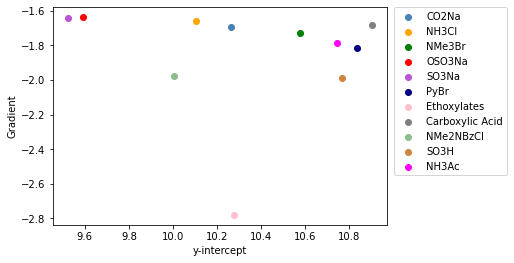

In [25]:
grad_intercept_plotter(head_group_for_tail, logP_y_int_tail, logP_grad_tail, colours, False, 
                       "logP_grad_inter_tailpred.png")

*Plots all data*

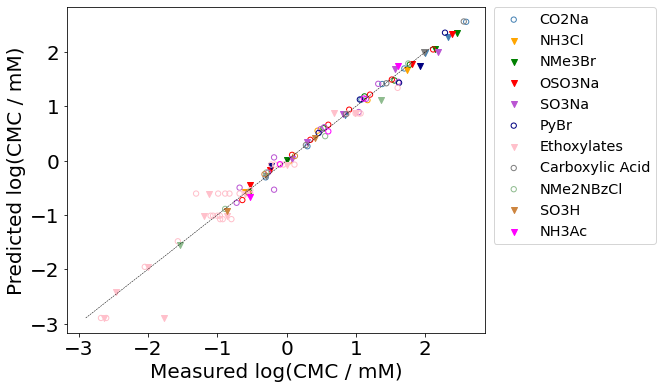

In [26]:
logP_tail_pred, logP_tail_pred_diff = pred_true_cmc_data2(cmc_select_tail, logP_select_tail, logP_grad_tail, 
                                                        logP_y_int_tail,startfunc_pos, endfunc_pos, 
                                                        head_group_for_tail)

pred_meas_cmc_plotter(logP_tail_pred, cmc_select_tail, 600, 600, True, colours, head_group_for_tail, 
                      logP_was_test_tail, 1, "logP_pred_meas_tailpred_log.png", False)

*Difference between predicted and measured value*

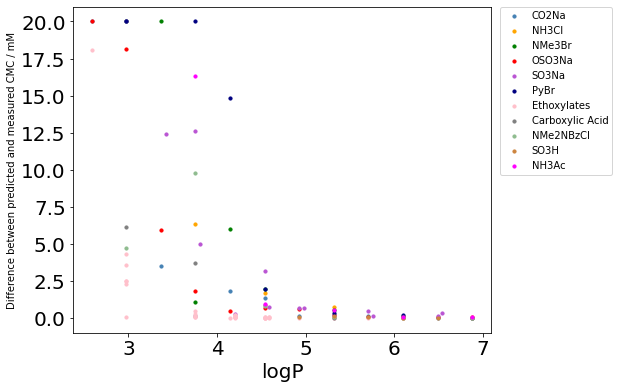

In [27]:
diff_true_cmc_plotter(logP_tail_pred_diff, 20, logP_select_tail, colours, head_group_for_tail, 1, "logP",
                     "logP_diff_pred_meas_tailpred.png")

***MW***

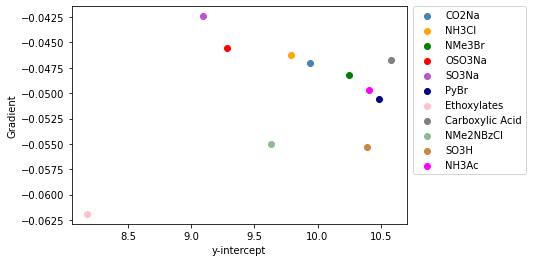

In [28]:
grad_intercept_plotter(head_group_for_tail, MW_y_int_tail, MW_grad_tail, colours, False, 
                       "MW_grad_inter_tailpred.png")

*Plots all data* 

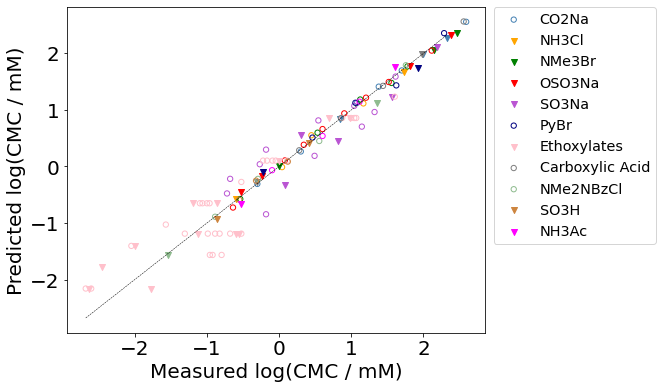

In [29]:
MW_tail_pred, MW_tail_pred_diff = pred_true_cmc_data2(cmc_select_tail, MW_select_tail, MW_grad_tail, MW_y_int_tail,
                                                     startfunc_pos, endfunc_pos, head_group_for_tail)

pred_meas_cmc_plotter(MW_tail_pred, cmc_select_tail, 600, 600, True, colours, head_group_for_tail, 
                      MW_was_test_tail, 1, "MW_pred_meas_tailpred_log.png", False)

*Difference between predicted and measured value*

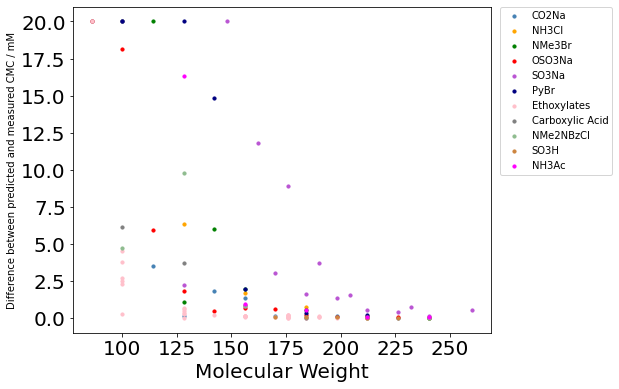

In [30]:
diff_true_cmc_plotter(MW_tail_pred_diff, 20, MW_select_tail, colours, head_group_for_tail, 1, "Molecular Weight",
                     "MW_diff_pred_meas_tailpred.png")

***NVE***

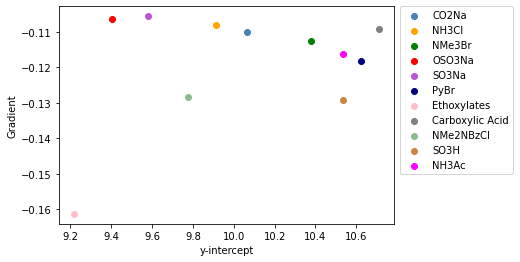

In [31]:
grad_intercept_plotter(head_group_for_tail, NVE_y_int_tail, NVE_grad_tail, colours, False, 
                       "NVE_grad_inter_tailpred.png")

*Plots all data*

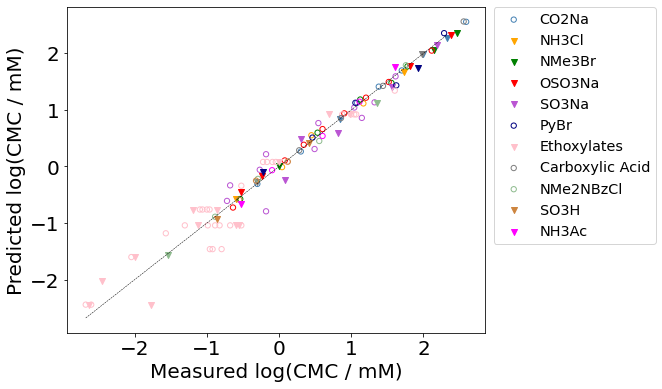

In [32]:
NVE_tail_pred, NVE_tail_pred_diff = pred_true_cmc_data2(cmc_select_tail, NVE_select_tail, NVE_grad_tail, 
                                                        NVE_y_int_tail,startfunc_pos, endfunc_pos, 
                                                        head_group_for_tail)

pred_meas_cmc_plotter(NVE_tail_pred, cmc_select_tail, 600, 600, True, colours, head_group_for_tail, 
                      NVE_was_test_tail, 1, "NVE_pred_meas_tailpred_log.png", False)

*Difference between predicted and measured value*

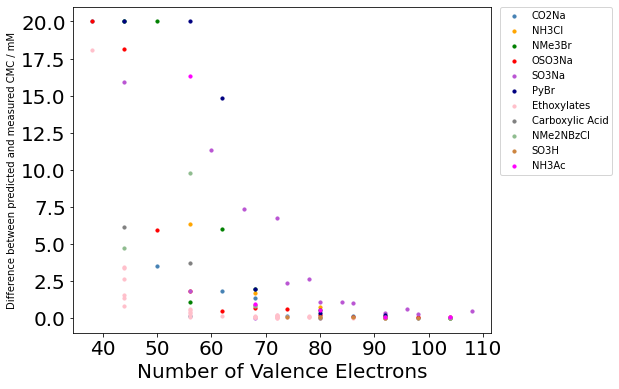

In [33]:
diff_true_cmc_plotter(NVE_tail_pred_diff, 20, NVE_select_tail, colours, head_group_for_tail, 1,
                      "Number of Valence Electrons", "NVE_diff_pred_meas_tailpred.png")

### Using data predicted for just the head group for molecules with the same tail group

***logP***

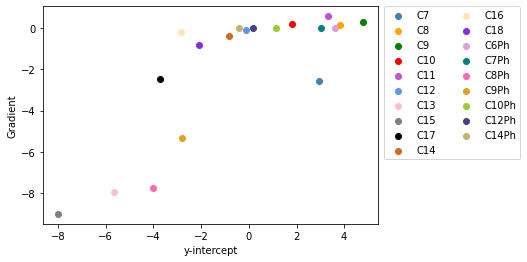

In [34]:
grad_intercept_plotter(tail_group_for_head, logP_y_int_head, logP_grad_head, colours2, True, 
                       "logP_grad_inter_headpred.png")

*Plots all data*

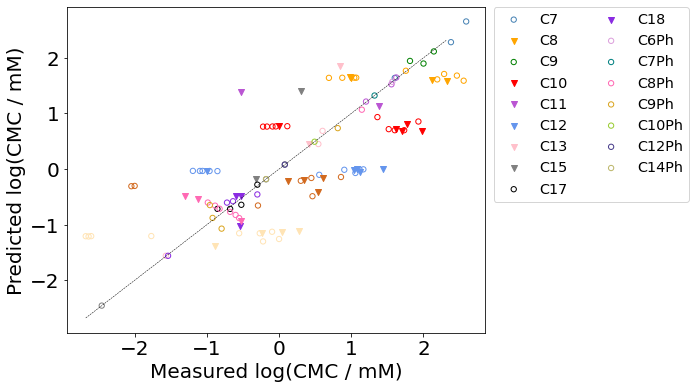

In [35]:
logP_head_pred, logP_head_pred_diff = pred_true_cmc_data(cmc_select_head, logP_select_head, logP_grad_head, 
                                                         logP_y_int_head)

pred_meas_cmc_plotter2(logP_head_pred, cmc_select_head, 600, 600, True, colours2, tail_group_for_head, 
                      logP_was_test_head, 2, "logP_pred_meas_headpred_log.png", False)

*Difference between predicted and measured value*

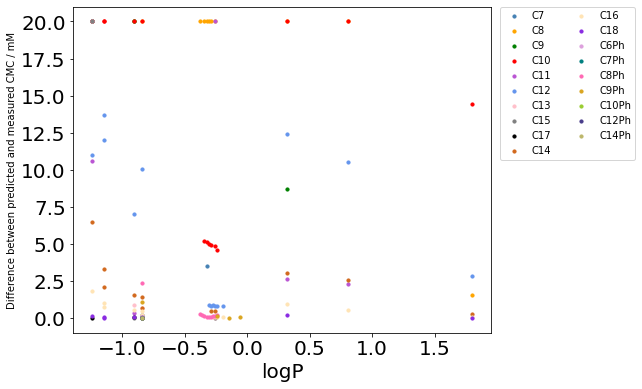

In [36]:
diff_true_cmc_plotter(logP_head_pred_diff, 20, logP_select_head, colours2, tail_group_for_head, 2, "logP",
                     "logP_diff_pred_meas_headpred.png")

***MW***

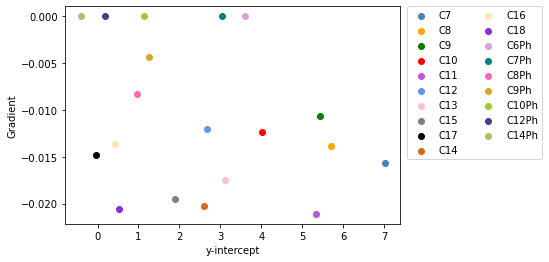

In [37]:
grad_intercept_plotter(tail_group_for_head, MW_y_int_head, MW_grad_head, colours2, True,
                       "MW_grad_inter_headpred.png")

*Plots all data* 

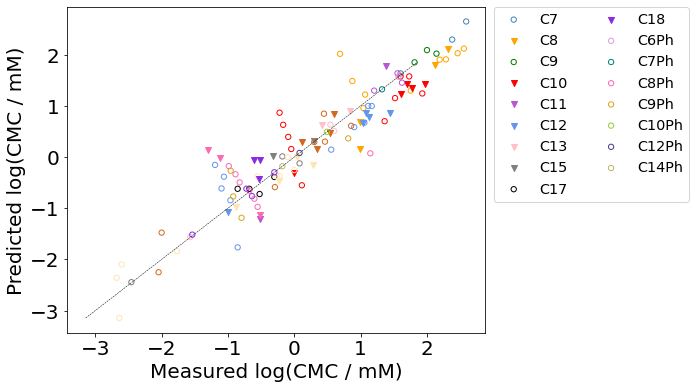

In [38]:
MW_head_pred, MW_head_pred_diff = pred_true_cmc_data(cmc_select_head, MW_select_head, MW_grad_head, MW_y_int_head)

pred_meas_cmc_plotter2(MW_head_pred, cmc_select_head, 600, 600, True, colours2, tail_group_for_head, 
                       MW_was_test_head, 2, "MW_pred_meas_headpred_log.png", False)

*Difference between predicted and measured value*

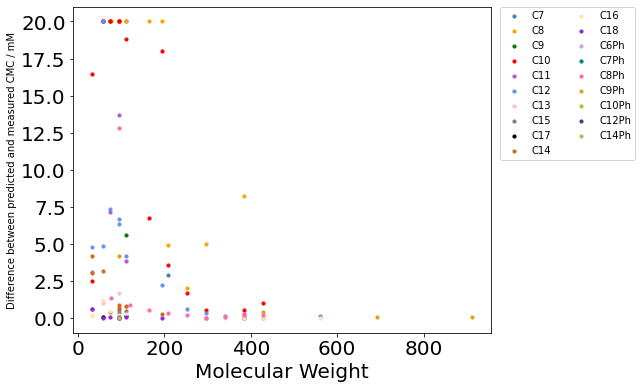

In [39]:
diff_true_cmc_plotter(MW_head_pred_diff, 20, MW_select_head, colours2, tail_group_for_head, 2, "Molecular Weight",
                     "MW_diff_pred_meas_headpred.png")

***NVE***

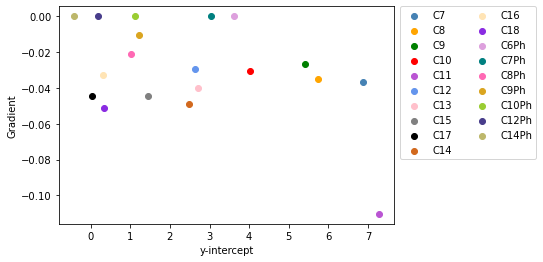

In [40]:
grad_intercept_plotter(tail_group_for_head, NVE_y_int_head, NVE_grad_head, colours2, True,
                       "NVE_grad_inter_headpred.png")

*Plots all data*

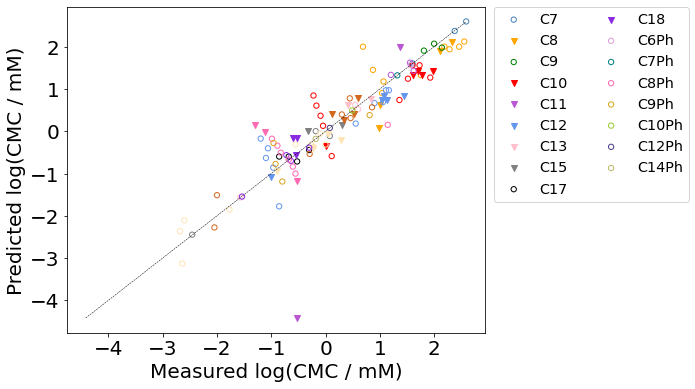

In [41]:
NVE_head_pred, NVE_head_pred_diff = pred_true_cmc_data(cmc_select_head, NVE_select_head, NVE_grad_head, 
                                                       NVE_y_int_head)

pred_meas_cmc_plotter2(NVE_head_pred, cmc_select_head, 600, 600, True, colours2, tail_group_for_head, 
                       NVE_was_test_head, 2, "NVE_pred_meas_headpred_log.png", False)

*Difference between predicted and measured value*

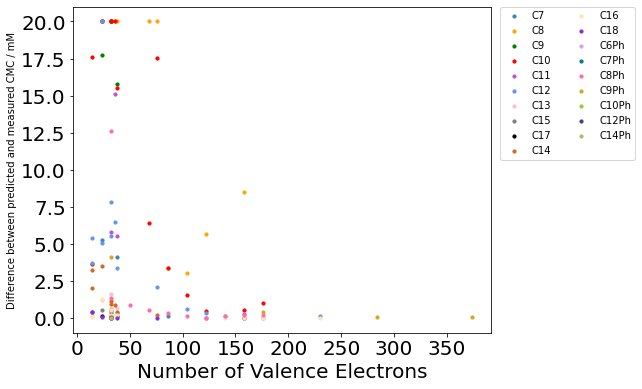

In [42]:
diff_true_cmc_plotter(NVE_head_pred_diff, 20, NVE_select_head, colours2, tail_group_for_head, 2, 
                      "Number of Valence Electrons", "NVE_diff_pred_meas_headpred.png")

***Comparing two predictions***

Compares predictions made using descriptors calculated from tail group only and head group only. This is done by finding the difference between the values and averaging the values and then plotting this value against the measured value. 

***logP***

*Difference between predicted values*

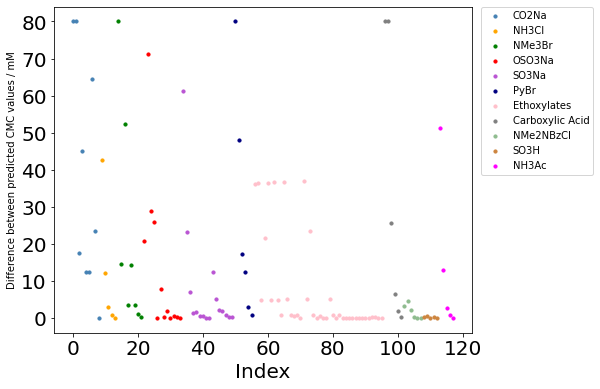

In [43]:
logP_av_pred, logP_pred_diff, logP_pred_ind, logP_was_test = average_diff_pred(logP_head_pred, logP_tail_pred, 
                                                                               pos_same_tail, pos_same_head, 
                                                                               logP_was_test_head, 
                                                                               logP_was_test_tail)

plot_diff_predict_cmc(logP_pred_diff, 80, logP_pred_ind, func_group, colours, "logP_diff_head_tail_pred.png")

*Plots all data (average prediction)*

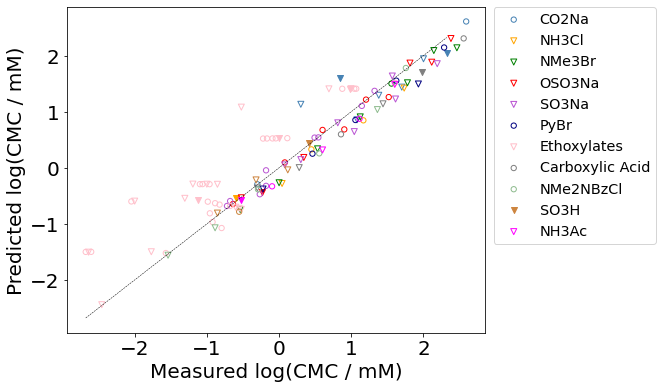

In [44]:
av_meas_pred_plotter(600, 600, logP_av_pred, cmc_vals, logP_pred_ind, logP_was_test, func_group, True, colours, 1,
                    "logP_av_head_tail_meas_pred_log.png", False)

***MW***

*Difference between predicted values*

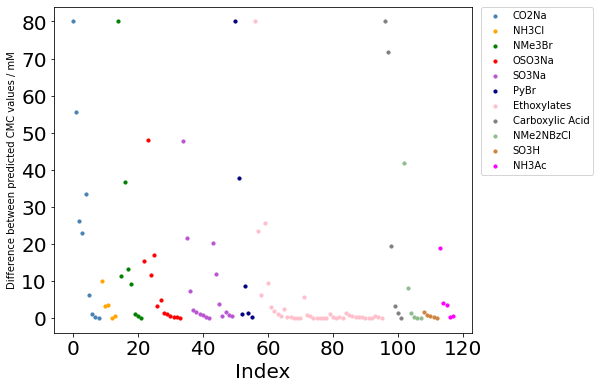

In [45]:
MW_av_pred, MW_pred_diff, MW_pred_ind, MW_was_test = average_diff_pred(MW_head_pred, MW_tail_pred, pos_same_tail, 
                                                                       pos_same_head, logP_was_test_head, 
                                                                       logP_was_test_tail)

plot_diff_predict_cmc(MW_pred_diff, 80, MW_pred_ind, func_group, colours, "MW_diff_head_tail_pred.png")

*Plots all data (average prediction)*

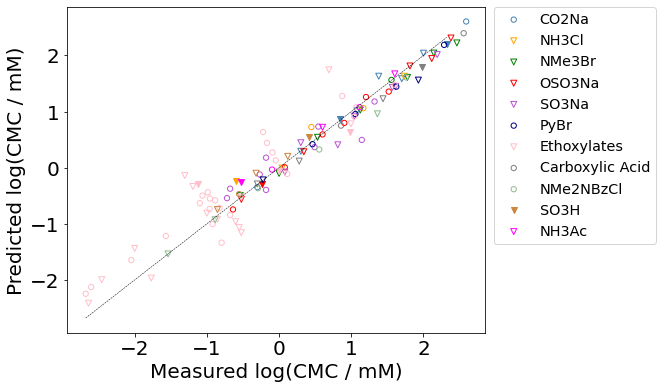

In [46]:
av_meas_pred_plotter(600, 600, MW_av_pred, cmc_vals, MW_pred_ind, MW_was_test, func_group, True, colours, 1,
                    "MW_av_head_tail_meas_pred_log.png", False)

***NVE***

*Difference between predicted values*

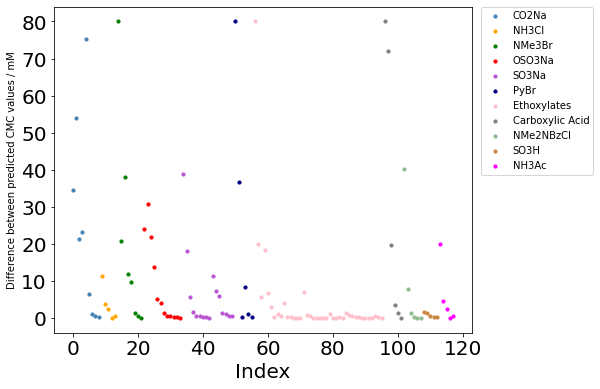

In [47]:
NVE_av_pred, NVE_pred_diff, NVE_pred_ind, NVE_was_test = average_diff_pred(NVE_head_pred, NVE_tail_pred, 
                                                                           pos_same_tail, pos_same_head, 
                                                                           logP_was_test_head, logP_was_test_tail)

plot_diff_predict_cmc(NVE_pred_diff, 80, NVE_pred_ind, func_group, colours, "NVE_diff_head_tail_pred.png")

*Plots all data (average prediction)*

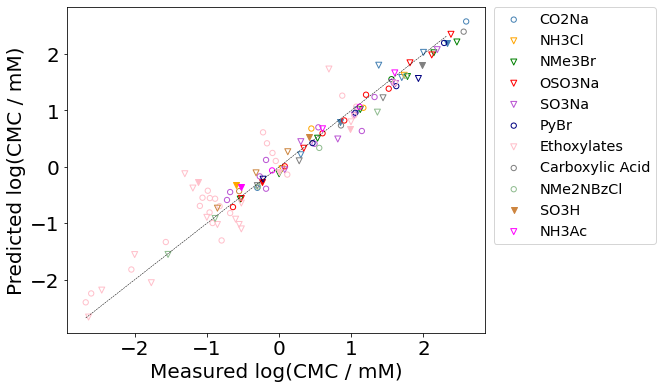

In [48]:
av_meas_pred_plotter(600, 600, NVE_av_pred, cmc_vals, NVE_pred_ind, NVE_was_test, func_group, True, colours, 1,
                    "NVE_av_head_tail_meas_pred_log.png", False)